In [7]:
from getdata import GetDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from scipy.signal import savgol_filter
import os


In [2]:
data_orig,target = GetDataset(CreateDataFrame=True).Outputdata()

In [3]:
#Interpolacion para que los datos en x1 sean x distantes
x = np.linspace(data_orig[0][0].min(),data_orig[0][0].max(),901)
temp = np.zeros((data_orig.shape[0],901))
for i in range(data_orig.shape[0]):
    temp[i,:] = np.interp(x,data_orig[i][0][:],data_orig[i][1][:])

In [4]:
# Creacion de arreglos matriciales 30x30 2 channels
data = np.zeros((temp.shape[0],temp.shape[1],2))
for i in range(data.shape[0]):
    data[i,:,0] = savgol_filter(temp[i,:], window_length=50, polyorder=2)
    data[i,:,1] = np.gradient(savgol_filter(data[i,:,0], window_length=50, polyorder=2))

In [5]:
torch.manual_seed(42)
shuffle_idx = torch.randperm(3090, dtype = torch.long)
data_shuffle = data[shuffle_idx]
target_shuffle = target[shuffle_idx]
shuffle_idx

tensor([2082, 2966, 2862,  ...,  847, 2232, 1707])

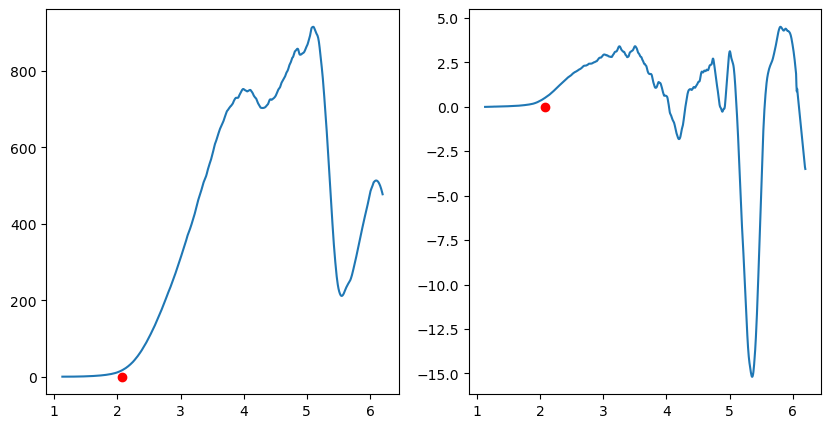

In [6]:
ID = 4
fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].plot(x, data_shuffle[ID,:,0] )
axs[0].scatter(target_shuffle[ID],0, color='red')

axs[1].plot(x, data_shuffle[ID,:,1] )
axs[1].scatter(target_shuffle[ID],0, color='red')

In [21]:
def images(x, data_shuffle, carpeta1, carpeta2):
    
    if not os.path.exists(carpeta1):
        os.makedirs(carpeta1)
        
    if not os.path.exists(carpeta2):
        os.makedirs(carpeta2)

    for i in range(data_shuffle.shape[0]):
        ruta_imagen1 = os.path.join(carpeta1, f"{i}.png") 

        plt.figure(figsize= (3, 3))
        plt.plot(x, data_shuffle[i,:,0],  color='k', linewidth=1.5)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(ruta_imagen1, bbox_inches='tight', pad_inches=0)  
        plt.close() 
        
      
    for j in range(data_shuffle.shape[0]):
        ruta_imagen2 = os.path.join(carpeta2, f"{j}.png") 
        plt.figure(figsize= (3, 3))
        plt.plot(x, data_shuffle[j,:,1],  color='k', linewidth=1.5 )
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(ruta_imagen2, bbox_inches='tight', pad_inches=0)  
        plt.close() 
        
carpeta1 = "Dataset/img/imagenes"
carpeta2 = "Dataset/img/imagenes_derivate"

images(x, data_shuffle, carpeta1,carpeta2 )